# **Demo of connecting Robbins lunar database to LROC mosaic**


---

---

The following code entails the steps on how the Robbins database was connected to the mosaics in general (for both lunar and Mars). Note that this is a bit different to the actual code that was used in that it does not modify the bounding boxes that are out-of-bounds.



# Setting up


---



In [1]:
import pandas as pd
import numpy as np
from tifffile import imread
from PIL import Image
import os
import math
from PIL import Image
import pandas
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
# Downloading Robbins database and LROC mosaic
!wget -P . 'https://astropedia.astrogeology.usgs.gov/download/Moon/Research/Craters/lunar_crater_database_robbins_2018'
!wget -P . https://planetarymaps.usgs.gov/mosaic/Lunar_LRO_LROC-WAC_Mosaic_global_100m_June2013.tif

# Unzipping Robbins database
!unzip lunar_crater_database_robbins_2018
!mv /content/lunar_crater_database_robbins_2018_bundle/data/lunar_crater_database_robbins_2018.csv /content/

# Reading image and CSV file
ppd = 303.2334 # pixel per degree
data = pandas.read_csv("lunar_crater_database_robbins_2018.csv")
im = imread("Lunar_LRO_LROC-WAC_Mosaic_global_100m_June2013.tif")
lat = data["LAT_CIRC_IMG"]
lon = data["LON_CIRC_IMG"]
d = data["DIAM_CIRC_IMG"]

--2021-08-31 14:17:16--  https://astropedia.astrogeology.usgs.gov/download/Moon/Research/Craters/lunar_crater_database_robbins_2018
Resolving astropedia.astrogeology.usgs.gov (astropedia.astrogeology.usgs.gov)... 137.227.239.81, 2001:49c8:c000:122d::81
Connecting to astropedia.astrogeology.usgs.gov (astropedia.astrogeology.usgs.gov)|137.227.239.81|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 96227201 (92M) [application/zip]
Saving to: ‘./lunar_crater_database_robbins_2018’

lunar_crater_databa 100%[===================>]  91.77M  10.2MB/s    in 8.7s    

2021-08-31 14:17:25 (10.5 MB/s) - ‘./lunar_crater_database_robbins_2018’ saved [96227201/96227201]

--2021-08-31 14:17:25--  https://planetarymaps.usgs.gov/mosaic/Lunar_LRO_LROC-WAC_Mosaic_global_100m_June2013.tif
Resolving planetarymaps.usgs.gov (planetarymaps.usgs.gov)... 66.85.141.154
Connecting to planetarymaps.usgs.gov (planetarymaps.usgs.gov)|66.85.141.154|:443... connected.
HTTP request sent, awaiting r

#Plotting


---

Enter your desired region in the following cell:

Longitude : -180 -> 180

Latitude : -90 -> 90

In [5]:
x1 = -100.6 # Lower bound of longitude
x2 = -99.6   # Upper bound of longitude
y1 = 2.6         # Lower bound of latitude
y2 = 3.6       # Upper bound of latitude

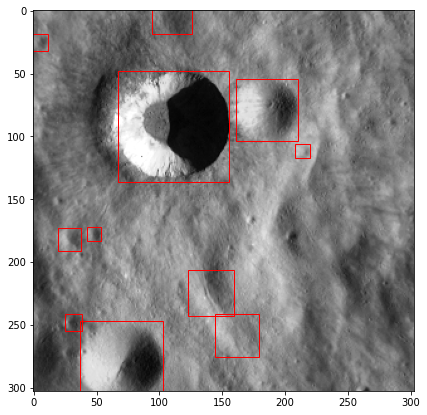

In [6]:
x = len(im[0]) # x dimensions of the big image
y = len(im)    # y dimensions of the big image

# Corresponding Column/Row number of the bounds in the big image
x11 = int((180+x1)/360*x) 
x22 = int((180+x2)/360*x)
y11 = int((90-y1)/180*y)
y22 = int((90-y2)/180*y)

# Finding the craters within the bound area and getting the coordinate values
craters = data[(lat <= y2) & (lat >= y1) & (lon <= (360+x2)%360) & (lon >= (360+x1)%360)]
craters_lat = craters["LAT_CIRC_IMG"]
craters_lon = craters["LON_CIRC_IMG"]
craters_diam= craters["DIAM_CIRC_IMG"]
craters_lat = craters_lat.to_numpy()
craters_lon = craters_lon.to_numpy()
craters_diam= craters_diam.to_numpy()

# Normalising to the image
craters_diam = craters_diam*10 # diameters are in km, each pixel = 100m, so its 10pixels per km
xx = (craters_lon - (360+x1)%360)*ppd   # Finding difference in lat/lon and multiply by pixel per degree
yy = (y2 - craters_lat)*ppd

# Plotting image
fig, ax = plt.subplots(figsize = (7,7))
ax.imshow(im[y22:y11,x11:x22],  cmap=plt.get_cmap('gray'))

# Plotting rectangle boxes
for k in range(len(xx)):
  rect = Rectangle((xx[k] - 0.5*craters_diam[k]/np.cos(craters_lat[k]*np.pi/180), 
                    yy[k] - 0.5*craters_diam[k]),
                    craters_diam[k]/np.cos(craters_lat[k]*np.pi/180), 
                    craters_diam[k],
                    linewidth=1, edgecolor='r', facecolor='none')
  ax.add_patch(rect)